In [60]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [6]:
df.shape

(140700, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

Combining academic pressure and work pressure columns

In [8]:
df['Work_Pressure'] = df['Academic Pressure'].combine_first(df['Work Pressure'])


Combine Study Satisfaction and Job Satisfaction column

In [9]:
df['Work_Satisfaction'] = df['Study Satisfaction'].combine_first(df['Job Satisfaction'])

In [10]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [11]:
df = df.drop(columns = ['id', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Name', 'Degree', 'City', 'Profession'])

In [12]:
df

,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work_Pressure,Work_Satisfaction
0,Female,49.0,Working Professional,NaN,More than 8 hours,Healthy,No,1.0,2.0,No,0,5.0,2.0
1,Male,26.0,Working Professional,NaN,Less than 5 hours,Unhealthy,Yes,7.0,3.0,No,1,4.0,3.0
2,Male,33.0,Student,8.97,5-6 hours,Healthy,Yes,3.0,1.0,No,1,5.0,2.0
3,Male,22.0,Working Professional,NaN,Less than 5 hours,Moderate,Yes,10.0,1.0,Yes,1,5.0,1.0
4,Female,30.0,Working Professional,NaN,5-6 hours,Unhealthy,Yes,9.0,4.0,Yes,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,Female,18.0,Working Professional,NaN,5-6 hours,Unhealthy,No,2.0,4.0,Yes,1,5.0,4.0
140696,Female,41.0,Working Professional,NaN,7-8 hours,Moderate,Yes,6.0,5.0,Yes,0,5.0,4.0
140697,Female,24.0,Working Professional,NaN,More than 8 hours,Moderate,No,4.0,4.0,No,0,3.0,1.0
140698,Female,49.0,Working Professional,NaN,5-6 hours,Moderate,Yes,10.0,1.0,No,0,5.0,2.0


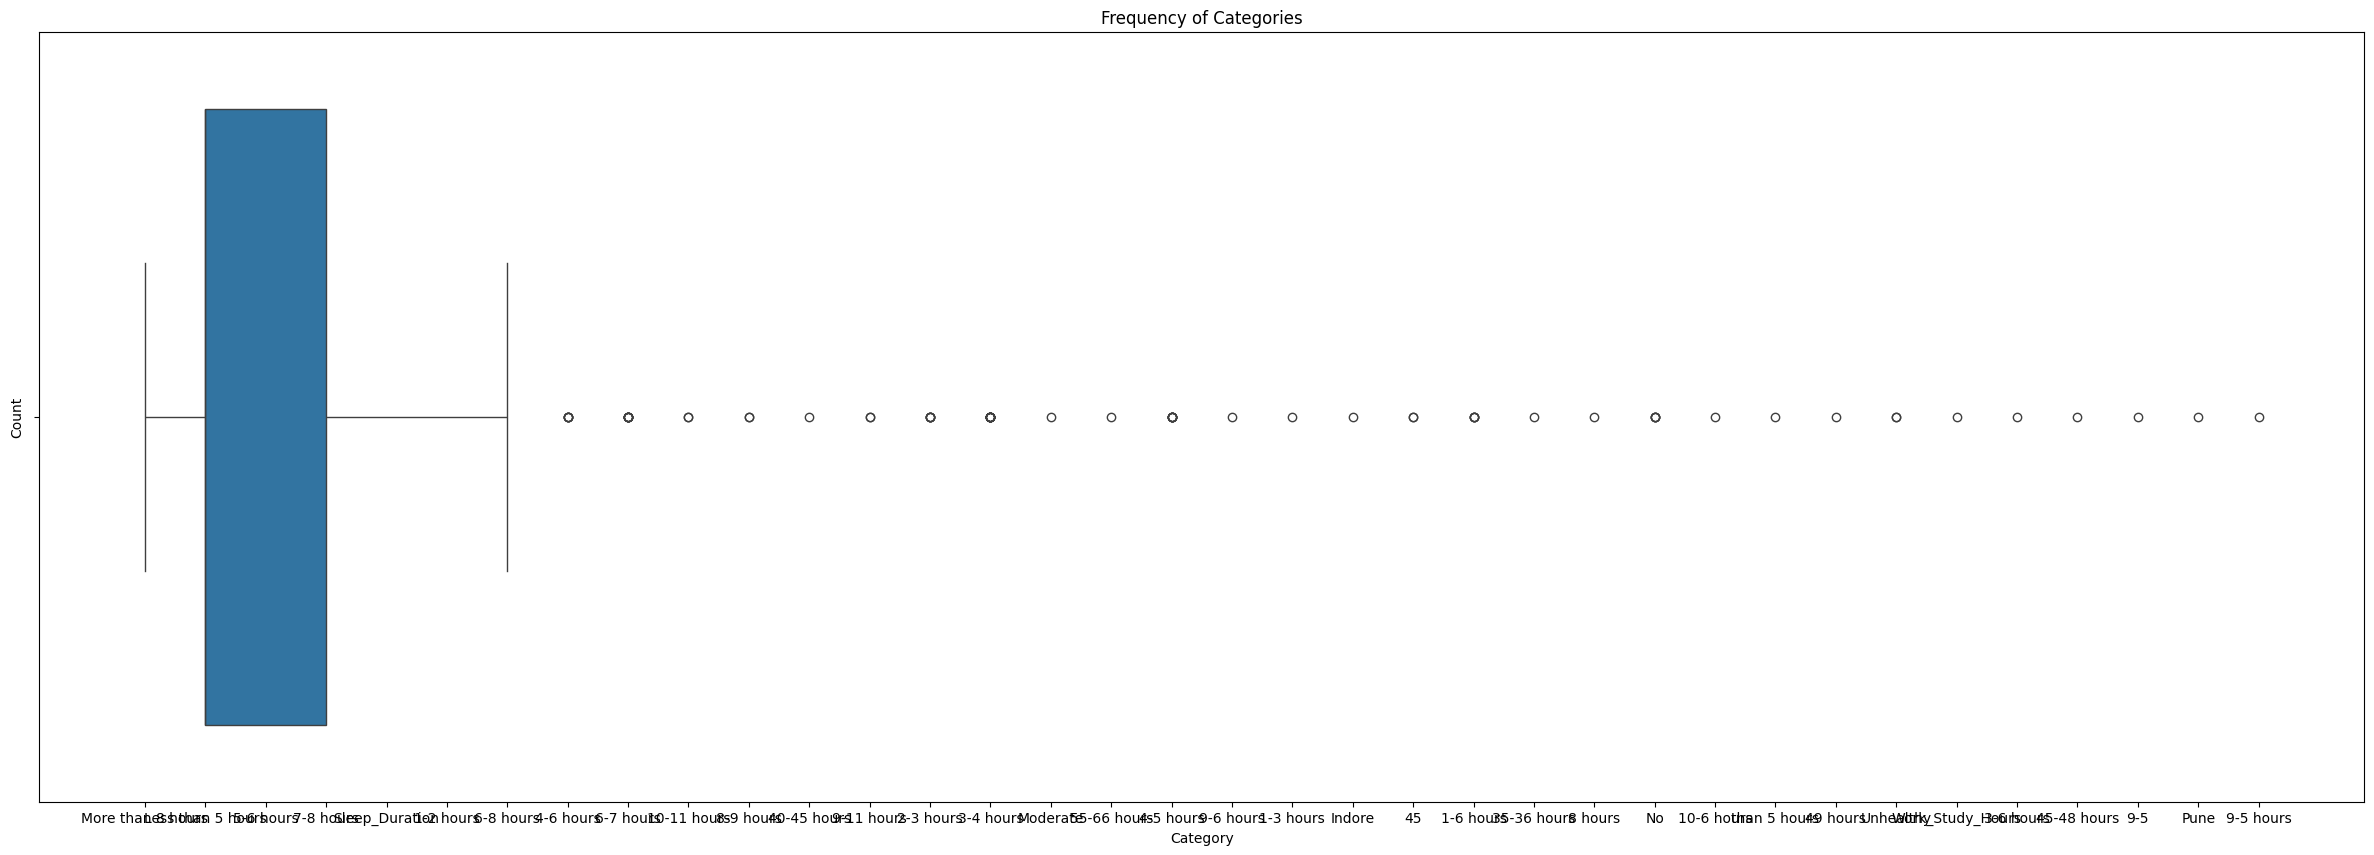

In [13]:
plt.figure(figsize=(30, 10))
sns.boxplot(x=df['Sleep Duration'])
plt.title('Frequency of Categories')
plt.xlabel('Category') 
plt.ylabel('Count') 
plt.show()

In [14]:
# Calculate the frequency of each category
category_counts = df['Sleep Duration'].value_counts()

# Set a threshold for "outlier" categories (e.g., categories that occur less than 1% of the time)
threshold = 0.01 * len(df)
rare_categories = category_counts[category_counts < threshold].index

# Show the rare categories (outliers)
print("Outlier categories: ", rare_categories)


Outlier categories:  Index(['3-4 hours', '6-7 hours', '4-5 hours', '2-3 hours', '4-6 hours',
       '6-8 hours', '1-6 hours', 'No', '9-11 hours', '10-11 hours',
       'Sleep_Duration', 'Unhealthy', '45', '8-9 hours', '10-6 hours', '9-5',
       '45-48 hours', '3-6 hours', 'Work_Study_Hours', '49 hours',
       'than 5 hours', 'Pune', '9-6 hours', '8 hours', '35-36 hours', 'Indore',
       '1-3 hours', '55-66 hours', 'Moderate', '40-45 hours', '1-2 hours',
       '9-5 hours'],
      dtype='object', name='Sleep Duration')


In [15]:
df = df[~df['Sleep Duration'].isin(rare_categories)]

In [16]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
Name: count, dtype: int64

In [17]:
correlation = df['CGPA'].corr(df['Depression'])
print(f"Correlation: {correlation}")

Correlation: 0.021517189920141955


<Axes: xlabel='Dietary Habits'>

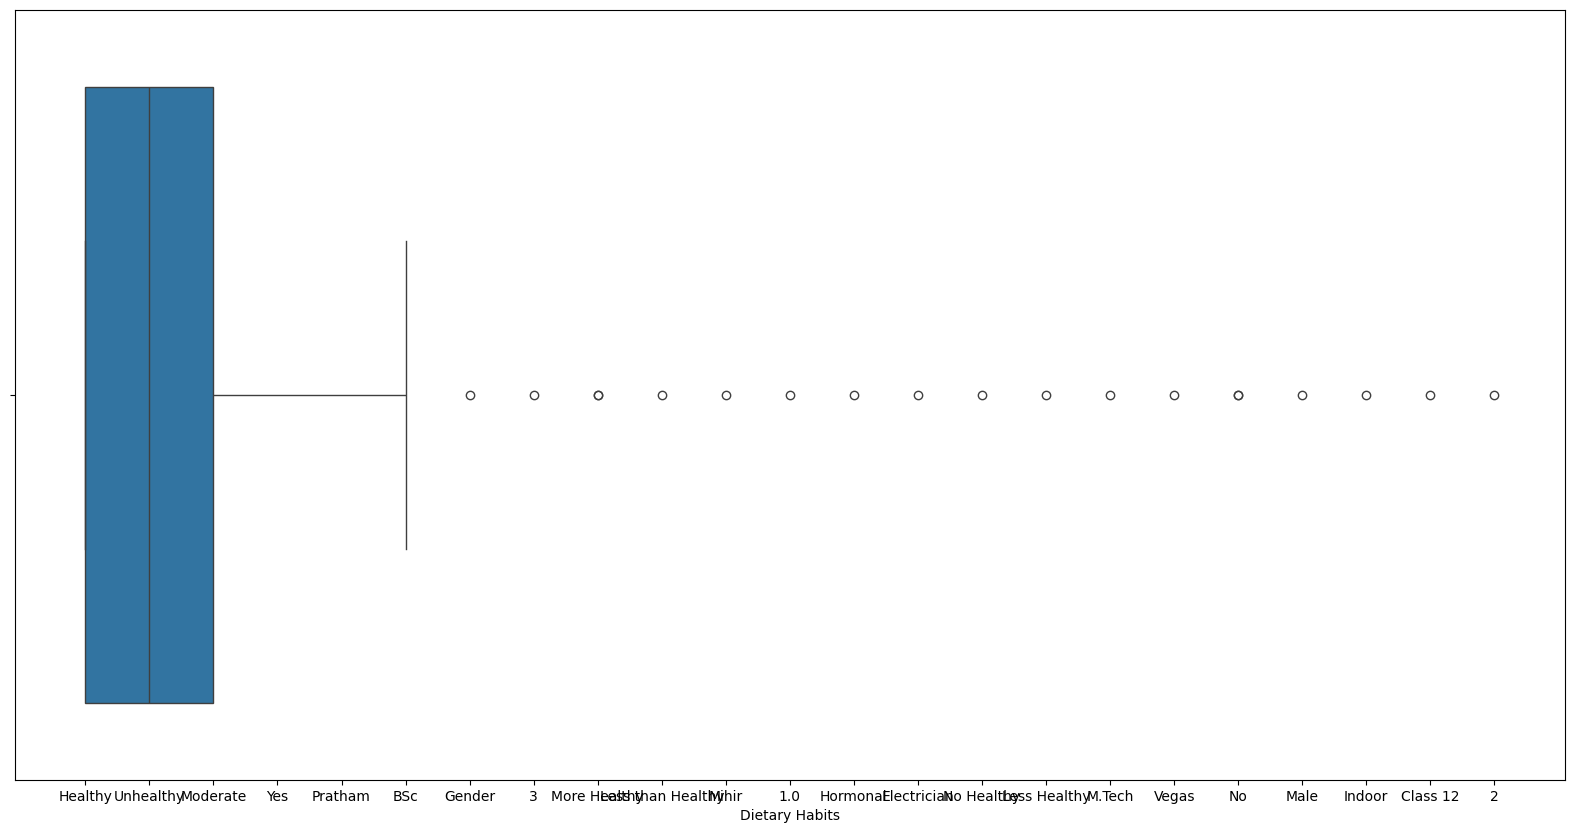

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(x = df['Dietary Habits'])

In [19]:
# Calculate the frequency of each category
category_counts = df['Dietary Habits'].value_counts()

# Set a threshold for "outlier" categories (e.g., categories that occur less than 1% of the time)
threshold = 0.01 * len(df)
outlier_categories = category_counts[category_counts < threshold].index

# Show the rare categories (outliers)
print("Outlier categories: ", outlier_categories)

Outlier categories:  Index(['Yes', 'No', 'More Healthy', 'No Healthy', 'Class 12', 'Indoor', 'Male',
       'Vegas', 'M.Tech', 'Less Healthy', '1.0', 'Electrician', 'Hormonal',
       'Mihir', 'Less than Healthy', '3', 'Gender', 'BSc', 'Pratham', '2'],
      dtype='object', name='Dietary Habits')


In [20]:
df = df[~df['Dietary Habits'].isin(outlier_categories)]

In [21]:
df.head()

,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work_Pressure,Work_Satisfaction
0,Female,49.0,Working Professional,NaN,More than 8 hours,Healthy,No,1.0,2.0,No,0,5.0,2.0
1,Male,26.0,Working Professional,NaN,Less than 5 hours,Unhealthy,Yes,7.0,3.0,No,1,4.0,3.0
2,Male,33.0,Student,8.97,5-6 hours,Healthy,Yes,3.0,1.0,No,1,5.0,2.0
3,Male,22.0,Working Professional,NaN,Less than 5 hours,Moderate,Yes,10.0,1.0,Yes,1,5.0,1.0
4,Female,30.0,Working Professional,NaN,5-6 hours,Unhealthy,Yes,9.0,4.0,Yes,0,1.0,1.0


In [22]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49670
Unhealthy    46201
Healthy      44723
Name: count, dtype: int64

Handling Null Values

In [23]:
df.isnull().sum()

Gender                                        0
Age                                           0
Working Professional or Student               0
CGPA                                     112728
Sleep Duration                                0
Dietary Habits                                4
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Work_Pressure                                21
Work_Satisfaction                            15
dtype: int64

In [24]:
column = ['Financial Stress', 'Dietary Habits', 'Work_Pressure', 'Work_Satisfaction']

for c in column:
    df[c] = df[c].fillna(df[c].mode()[0])

In [25]:
#df = df.drop('CGPA', axis = 1)

In [26]:
df.isnull().sum()

Gender                                        0
Age                                           0
Working Professional or Student               0
CGPA                                     112728
Sleep Duration                                0
Dietary Habits                                0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                    0
Work_Pressure                                 0
Work_Satisfaction                             0
dtype: int64

Label Encoding

In [27]:
le = LabelEncoder()

In [28]:
col = ['Gender','Working Professional or Student', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for c in col:
    df[c] = le.fit_transform(df[c])

In [29]:
df.head()

,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work_Pressure,Work_Satisfaction
0,0,49.0,1,NaN,3,0,0,1.0,2.0,0,0,5.0,2.0
1,1,26.0,1,NaN,2,2,1,7.0,3.0,0,1,4.0,3.0
2,1,33.0,0,8.97,0,0,1,3.0,1.0,0,1,5.0,2.0
3,1,22.0,1,NaN,2,1,1,10.0,1.0,1,1,5.0,1.0
4,0,30.0,1,NaN,0,2,1,9.0,4.0,1,0,1.0,1.0


In [30]:
df['Work_Pressure'].unique()

array([5., 4., 1., 2., 3.])

Splitting into training and testing data

In [31]:
df['Age']= df['Age'].astype(int)

In [32]:
x = df.drop('Depression', axis = 1)
y = df['Depression']
x.columns

Index(['Gender', 'Age', 'Working Professional or Student', 'CGPA',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Work_Pressure',
       'Work_Satisfaction'],
      dtype='object')

In [33]:
model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=10, random_state=42)
model.fit(x, y)

RandomForestClassifier(max_depth=20, min_samples_split=10, random_state=42)

In [34]:
y_pred = model.predict(x)

In [35]:
print(accuracy_score(y_pred, y))

print(recall_score(y, y_pred, average='weighted'))

print(precision_score(y, y_pred, average='weighted'))

print(f1_score(y, y_pred, average='weighted'))


0.961286789285765
0.961286789285765
0.9607974628689477
0.9609351731913658


In [36]:
feature_importances = model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)



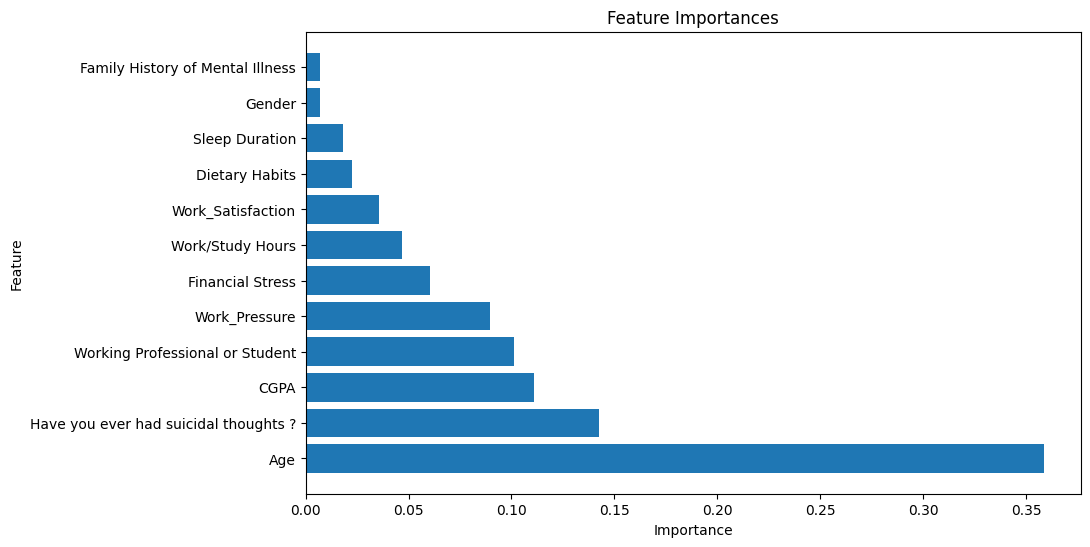

In [37]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


# Saving the model

In [38]:
import pickle

In [39]:
with open('depression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Predicting on Test Data

In [40]:
df_test = pd.read_csv('test.csv')

In [41]:
df_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [42]:
Id = df_test['id']

In [43]:
df_test.isnull().sum()

id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Working Professional or Student              0
Profession                               24632
Academic Pressure                        75033
Work Pressure                            18778
CGPA                                     75034
Study Satisfaction                       75033
Job Satisfaction                         18774
Sleep Duration                               0
Dietary Habits                               5
Degree                                       2
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
dtype: int64

In [44]:
df_test['Work_Pressure'] = df_test['Academic Pressure'].combine_first(df_test['Work Pressure'])
df_test['Work_Satisfaction'] = df_test['Job Satisfaction'].combine_first(df_test['Study Satisfaction'])


In [45]:
df_test = df_test.drop(columns = ['id', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Name', 'Degree', 'City', 'Profession'])

In [46]:
df_test['Dietary Habits'].unique()

array(['Moderate', 'Healthy', 'Unhealthy', 'More Healthy', 'No', 'Indoor',
       'Prachi', nan, 'Male', 'Less Healthy', 'Mealy', 'Resistant', 'MCA',
       '5 Healthy', 'Academic', 'Educational', 'Soham', '5 Unhealthy',
       'Vivaan', 'Raghav', '1.0', 'Naina', 'Kolkata'], dtype=object)

In [47]:
col = ['Sleep Duration', 'Dietary Habits']

for c in col:
    category_counts = df_test[c].value_counts()
    threshold = 0.01 * len(df_test)
    rare_categories = category_counts[category_counts < threshold].index
    print(rare_categories)
    
    mod_value = df_test[c].mode()[0]
    print(mod_value)
    df_test[c] = df_test[c].apply(lambda x: mod_value if x in rare_categories else x)





Index(['6-7 hours', '8-9 hours', '4-5 hours', '2-3 hours', '3-4 hours',
       '9-5 hours', '1-6 hours', '9-5', 'Meerut', '4-6 hours', '1-2 hours',
       '10-6 hours', '9-10 hours', '9-11 hours', '50-75 hours', '6 hours',
       '1-3 hours', '8-89 hours', '20-21 hours',
       'Have_you_ever_had_suicidal_thoughts', '60-65 hours', '9-6 hours',
       'than 5 hours', '0', 'Unhealthy', 'Vivan', '3-6 hours'],
      dtype='object', name='Sleep Duration')
Less than 5 hours
Index(['No', 'More Healthy', 'Academic', 'Naina', '1.0', 'Raghav', 'Vivaan',
       '5 Unhealthy', 'Soham', 'Educational', 'MCA', '5 Healthy', 'Resistant',
       'Mealy', 'Less Healthy', 'Male', 'Prachi', 'Indoor', 'Kolkata'],
      dtype='object', name='Dietary Habits')
Moderate


In [48]:
column = ['Financial Stress', 'Dietary Habits', 'Work_Pressure', 'Work_Satisfaction']

for c in column:
    df_test[c] = df_test[c].fillna(df_test[c].mode()[0])

In [49]:
df_test.isnull().sum()

Gender                                       0
Age                                          0
Working Professional or Student              0
CGPA                                     75034
Sleep Duration                               0
Dietary Habits                               0
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             0
Family History of Mental Illness             0
Work_Pressure                                0
Work_Satisfaction                            0
dtype: int64

In [50]:
df_test

,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Work_Pressure,Work_Satisfaction
0,Male,53.0,Working Professional,NaN,Less than 5 hours,Moderate,No,9.0,3.0,Yes,2.0,5.0
1,Female,58.0,Working Professional,NaN,Less than 5 hours,Moderate,No,6.0,4.0,No,2.0,4.0
2,Male,53.0,Working Professional,NaN,7-8 hours,Moderate,Yes,12.0,4.0,No,4.0,1.0
3,Female,23.0,Student,6.84,More than 8 hours,Moderate,Yes,10.0,4.0,No,5.0,1.0
4,Male,47.0,Working Professional,NaN,7-8 hours,Moderate,Yes,3.0,4.0,No,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93795,Female,49.0,Working Professional,NaN,Less than 5 hours,Moderate,Yes,2.0,2.0,Yes,3.0,5.0
93796,Male,29.0,Working Professional,NaN,7-8 hours,Moderate,Yes,11.0,3.0,Yes,5.0,1.0
93797,Male,24.0,Student,7.51,7-8 hours,Moderate,No,7.0,1.0,No,1.0,4.0
93798,Female,23.0,Working Professional,NaN,5-6 hours,Healthy,Yes,7.0,5.0,Yes,4.0,2.0


In [51]:
col = ['Gender','Working Professional or Student', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for c in col:
    df_test[c] = le.fit_transform(df_test[c])

In [52]:
df_test

,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Work_Pressure,Work_Satisfaction
0,1,53.0,1,NaN,2,1,0,9.0,3.0,1,2.0,5.0
1,0,58.0,1,NaN,2,1,0,6.0,4.0,0,2.0,4.0
2,1,53.0,1,NaN,1,1,1,12.0,4.0,0,4.0,1.0
3,0,23.0,0,6.84,3,1,1,10.0,4.0,0,5.0,1.0
4,1,47.0,1,NaN,1,1,1,3.0,4.0,0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0,49.0,1,NaN,2,1,1,2.0,2.0,1,3.0,5.0
93796,1,29.0,1,NaN,1,1,1,11.0,3.0,1,5.0,1.0
93797,1,24.0,0,7.51,1,1,0,7.0,1.0,0,1.0,4.0
93798,0,23.0,1,NaN,0,0,1,7.0,5.0,1,4.0,2.0


In [53]:
y_test_pred = model.predict(df_test)

In [54]:
y_test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
Depression = pd.DataFrame(y_test_pred, columns = ['Depression'])

In [56]:
result = pd.concat([Id, Depression], axis = 1)

In [57]:
result

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [58]:
result.to_csv('submission_Depression.csv', index = False)